In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import numpy.random as rnd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(42)

In [2]:
#Construct a dataset with noise
m = 20 #number of data points
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [3]:
#We are buildling a model y = (beta1 * X**2) + (beta2 * X) + beta3
#Our task is to approximate the values of beta1, beta2 and beta3
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#we need to approximate the polynomial degree
#try overfitting by setting the model degree = 50 and observe the divergence of the RMSE on the learning curves
#try underfitting by setting the model degree = 1 and observe the gap between the RMSE on the learning curves
degree = 50

#PolynomialFeatures returns the design matrix X for the specified degree, see Matrix Algebra explanation given here: https://en.wikipedia.org/wiki/Polynomial_regression
#Change the degre hyperparameter and note the learning cuves as the model overfits and underfits the data
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

#poly_features.fit_transform returns the X features in an array with shape [n_samples, n_features_new] according the coefficients calculated
X_poly = poly_features.fit_transform(X)

#note the names of the two features 
#print("Feature names",poly_features.get_feature_names(),"\n")

#note the array of features with shape [n_samples, n_features_new]
#print("Feature array\n",X_poly)

#build the regression line using the features array
lin_reg = LinearRegression()

#print("X_poly",X_poly)
#print("y",y)

#note we pass lin_reg.fit() the features of our model
lin_reg.fit(X_poly,y)

#print the coefficients, note these produce the least squares regression 
##print(lin_reg.intercept_,lin_reg.coef_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#a function that plots the training curves for a given model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    #split the data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    
    #define an array to hold the errors
    train_errors, val_errors = [],[]
    
    #from training set of size 1 to length of the entire training set, compute the training and validation errors.
    for m in range(1,len(X_train)):
        
        #fit the model to the training data
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train[:m])
        
        #refit the model up to the new m value
        model.fit(X_train_poly,y_train[:m])

        #compute the y values for the training batch
        y_train_predict = model.predict(X_train_poly)
        
        #compute y predictions across the validation set
        y_val_predict = model.predict(poly_features.transform(X_val))
        
        #compute the training and validation errors and append these values to the array
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    
    #plot the Root Mean Square Error of the training and validation sets
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

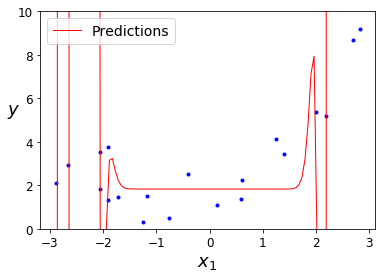

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#plot on the original points
plt.plot(X,y,"b.")

#We need a new model created in continuous linear space to construct the regression line
#define the number of points in space
X_continous=np.linspace(-2.9, 2.7,100).reshape(-1,1)
X_continous_poly = poly_features.fit_transform(X_continous)
y_continous_predict = lin_reg.predict(X_continous_poly)

#print("X_continuous_poly",X_continous_poly)

plt.plot(X_continous,y_continous_predict,"r-", linewidth=1, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.ylim([0,10])
plt.legend(loc="upper left", fontsize=14)

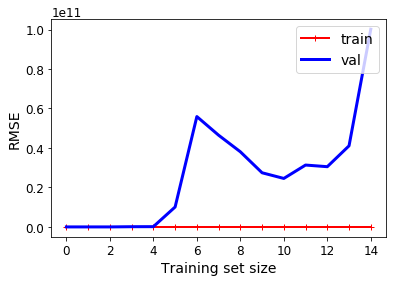

In [6]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.legend(loc="upper right", fontsize=14)   # not shown in the book
plt.xlabel("Training set size", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)  

#If there is a gap between the learning curves, then the model performs significantly better on the training data than on the validation data (overfitting)
#If both curves reach a plateau, are close and the RMSE is fairly high, the model is underfitting.